In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Función que describe la concentración del ensamblado Llave-cerradura
def concetracion_LK(n_0, alpha, lambda_, beta_u_eff_nor, k_0,l_0):
    beta_u_eff = beta_u_eff_nor * n_0                       #Potencial efectico de contacto para una concentración dada
    x          = - alpha*beta_u_eff  + np.log(n_0 * lambda_) #Variable dependiente de los parametros experimentales
    LK_nor     = (  ( 1 + np.exp(x) * ( k_0 + l_0 ) - np.sqrt( ( k_0 - l_0 )**2 * np.exp(2*x) + 2 * ( k_0 + l_0 )*np.exp(x) + 1 ) ) / ( 2 * np.exp(x) )  )
    return LK_nor

In [27]:
#Patametros generales
sigma_3            = 1                                                              #Factor de escala del sistema
sigma_1            = 10 * sigma_3                                                   #Diametro del coloide cerradura

# Patametros dEC
beta_u_eff_dEC     = np.loadtxt("beta_u_llave_cerradura_2D_contacto_dEC.csv",
				                 delimiter=",")[:,1]                                #Potencial efectivo con dEC varaible (1 corrida)
dEC_var            = np.loadtxt("beta_u_llave_cerradura_2D_contacto_dEC.csv",
				                 delimiter=",")[:,0] * sigma_3                      #dEC Variable (1 corrida)
dEC_sta            = 5 * sigma_3                                                    #dEC estática (2 corrida)

#Patametros sigma_2
beta_u_eff_sigma_2 = np.loadtxt("beta_u_llave_cerradura_2D_contacto_sigma_2.csv",   
				                 delimiter=",")[:,1]                                #Potencial efectivo con sigma_2 varaible (2 corrida)
sigma_2_var        = np.loadtxt("beta_u_llave_cerradura_2D_contacto_sigma_2.csv",
				                 delimiter=",")[:,0] * sigma_3                      #sigma_2 Variable (2 corrida)
sigma_2_sta        = 10 * sigma_3                                                   #sigma_2 estático (1 corrida)

#Concentraciones usadas
n_0_var            = np.linspace(0.001,1.0,10000)                                   #Concentración numerica de depletantes varaible (1 y 2 corrida) 
n_0_sta            = 0.1                                                            #Concentración numerica de depletantes estática (3 corrida) 


k_0_sta            = 1.0                                                            #Concetracion de coloide llave estático (1 y 2 corrida) 
k_0_var            = np.linspace(0.1,1.9,19)                                         #Concetracion de coloide llave variable (3 corrida) 


l_0_sta            = 1.0                                                            #Concetracion de coloide cerradura estático (1 y 2 corrida) 
l_0_var            = 2-k_0_var                                                      #Concetracion de coloide cerradura variable (3 corrida)

alpha              = 1                                                              #Parametro experimental
lambda_            = 1                                                              #Parametro experimental

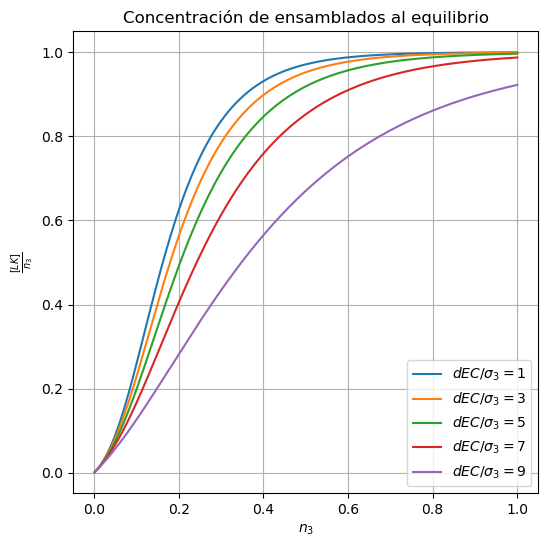

In [28]:
#Gráfico primer corrida 
# sigma_1 = sigma_2 = 10 sigma_3
# l_0 = k_0 = 1.0
# alpha = lambda = 1

fig, ax = plt.subplots(figsize=[6, 6])

for j in range(len(dEC_var)):
    ax.plot( n_0_var, concetracion_LK(n_0_var, alpha, lambda_, beta_u_eff_dEC[j], k_0_sta,l_0_sta), label=r'$dEC/\sigma_3=$'+str(int(dEC_var[j])))
   
ax.set_title('Concentración de ensamblados al equilibrio')
ax.set_ylabel(r'$\frac{[LK]}{n_3}$')
ax.set_xlabel(r'$n_3$')
ax.legend()
ax.grid(True)
plt.savefig("Grafico_concentración_ensamblado_dEC.png", dpi=500)
plt.show()

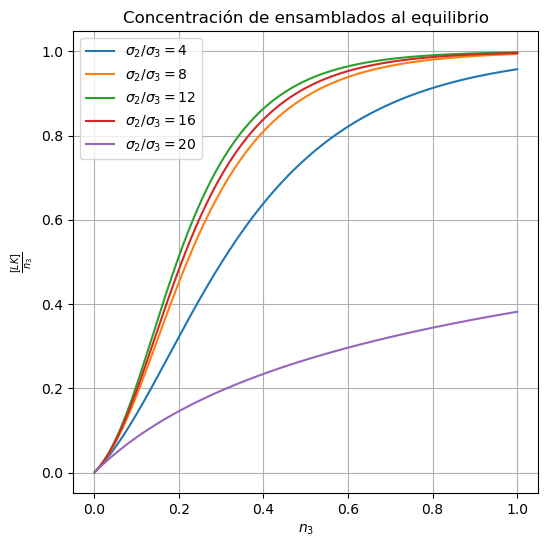

In [29]:
#Gráfico segunda corrida 
# sigma_1 =  10 sigma_3
# dEC = 5 sigma_3
# l_0 = k_0 = 1.0
# alpha = lambda = 1

fig, ax = plt.subplots(figsize=[6, 6])

for j in range(len(sigma_2_var)):
    ax.plot( n_0_var, concetracion_LK(n_0_var, alpha, lambda_, beta_u_eff_sigma_2[j], k_0_sta,l_0_sta), label=r'$\sigma_2/\sigma_3=$'+str(int(sigma_2_var[j])))
   
ax.set_title('Concentración de ensamblados al equilibrio')
ax.set_ylabel(r'$\frac{[LK]}{n_3}$')
ax.set_xlabel(r'$n_3$')
ax.legend()
ax.grid(True)
plt.savefig("Grafico_concentración_ensamblado_sigma_2.png", dpi=500)
plt.show()

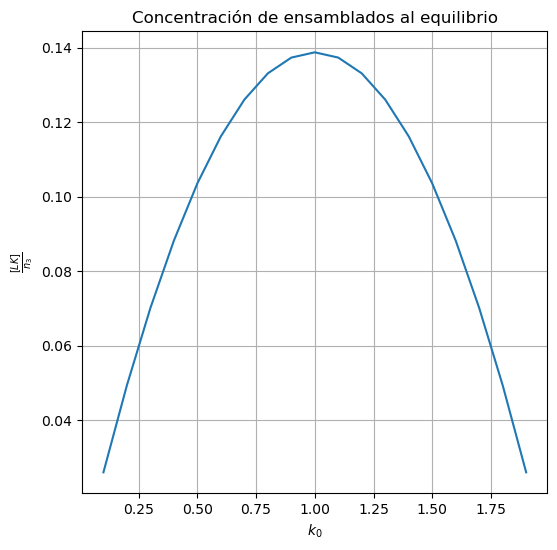

In [30]:
#Gráfico Tercer corrida
# sigma_1 =  10 sigma_3
# sigma_2 =  5 sigma_3
# dEC = 5 sigma_3
# l_0 = k_0 = 1.0
# n_0 = 0.1
# alpha = lambda = 1

fig, ax = plt.subplots(figsize=[6, 6])


ax.plot( k_0_var, concetracion_LK(n_0_sta, alpha, lambda_, beta_u_eff_sigma_2[0], k_0_var,l_0_var))
   
ax.set_title('Concentración de ensamblados al equilibrio')
ax.set_ylabel(r'$\frac{[LK]}{n_3}$')
ax.set_xlabel(r'$k_0$')
ax.grid(True)
plt.savefig("Grafico_concentración_ensamblado_k_0_l_0.png", dpi=500)
plt.show()